### Import, Cleaning and Merging the Dataset

In [1]:
# Read the DataFrame from the file path
import pandas as pd; 
df1=pd.read_csv('/Users/f/Documents/Ironhack/PROJECT_5/Dataset/df_final_demo.txt'); 


# Check for missing values in df1
df1.isna().sum(); 

# Define columns to clean
columns_to_clean = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']; 

# Drop rows with missing values in the specified columns
cleaned_df1 = df1.dropna(subset=columns_to_clean); 

# Check for missing values in cleaned_df1
cleaned_df1.isna().sum(); 


# Read the DataFrame from the file path
df2=pd.read_csv('/Users/f/Documents/Ironhack/PROJECT_5/Dataset/df_final_experiment_clients.txt'); 


# Get the value counts for the 'Variation' column in df2
df2['Variation'].value_counts(); 

# Check for missing values in df2
df2.isna().sum(); 

# Drop rows with missing values in the 'Variation' column
df2_cleaned = df2.dropna(subset=['Variation']); 

# Get the value counts for 'Variation' after dropping NaNs
variation_counts = df2_cleaned['Variation'].value_counts(); 


# Filter df2_cleaned for 'Control' variation
control_group = df2_cleaned[df2_cleaned['Variation'] == 'Control']; 

# Filter df2_cleaned for 'Test' variation
test_group = df2_cleaned[df2_cleaned['Variation'] == 'Test']; 


# Read the DataFrame from the file path
df3=pd.read_csv('/Users/f/Documents/Ironhack/PROJECT_5/Dataset/df_final_web_data_pt_1.txt'); 


# Read the DataFrame from the file path
df4=pd.read_csv('/Users/f/Documents/Ironhack/PROJECT_5/Dataset/df_final_web_data_pt_2.txt'); 


# Concatenate df3 and df4 along the rows
process_df = pd.concat([df3,df4],ignore_index=True); 


# Get the set of 'client_id' in control_group
client_ids_control = set(control_group['client_id']); 


# Get the set of 'client_id' in test_group
client_ids_test = set(test_group['client_id']); 


# Calculate the difference between expected and actual count of 'client_id'
check = 50500 - len(client_ids_control) - len(client_ids_test); 


# Filter cleaned_df1 for 'Control' variation
control_group = cleaned_df1[cleaned_df1['client_id'].isin(client_ids_control)]; 

# Filter cleaned_df1 for 'Test' variation
test_group = cleaned_df1[cleaned_df1['client_id'].isin(client_ids_test)]; 


# Merge control_group with process_df on client_id
control_group_merged = pd.merge(control_group, process_df, on='client_id', how='inner')

# Merge test_group with process_df on client_id
test_group_merged = pd.merge(test_group, process_df, on='client_id', how='inner')

# Assuming control_group_merged is your DataFrame containing the 'gendr' column
# Calculate the total count of 'U' gender category
total_U_count = control_group_merged['gendr'].value_counts()['U']

# Calculate the count for each gender after splitting
count_M = total_U_count // 2
count_F = total_U_count - count_M

# Replace half of the 'U' counts with 'M' and the other half with 'F'
control_group_merged.loc[control_group_merged['gendr'] == 'U', 'gendr'] = ['M'] * count_M + ['F'] * count_F

# Assuming test_group is your DataFrame containing the 'gendr' column
# Drop the 'X' category
test_group_merged = test_group_merged[test_group_merged['gendr'] != 'X']

# Calculate the total count of 'U' gender category
total_U_count = test_group_merged['gendr'].value_counts()['U']

# Calculate the count for each gender after splitting
count_M = total_U_count // 2
count_F = total_U_count - count_M

# Replace half of the 'U' counts with 'M' and the other half with 'F'
test_group_merged.loc[test_group_merged['gendr'] == 'U', 'gendr'] = ['M'] * count_M + ['F'] * count_F

# Display the test_group_merged DataFrame
print(test_group_merged)

# Display the control_group_merged DataFrame
print(control_group_merged)
 



        client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
0          836976             6.0              73.0      60.5     M   
1          836976             6.0              73.0      60.5     M   
2          836976             6.0              73.0      60.5     M   
3          836976             6.0              73.0      60.5     M   
4          836976             6.0              73.0      60.5     M   
...           ...             ...               ...       ...   ...   
177782    7468138            18.0             222.0      61.0     F   
177783    7468138            18.0             222.0      61.0     F   
177784    7468138            18.0             222.0      61.0     F   
177785    7468138            18.0             222.0      61.0     F   
177786    7468138            18.0             222.0      61.0     F   

        num_accts        bal  calls_6_mnth  logons_6_mnth  \
0             2.0   45105.30           6.0            9.0   
1             2.0   45105

### Categorising the Dataset to see User Demographic

In [2]:
# Define the bin edges and labels for age categories
bin_edges = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
bin_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Create the 'age_category' column using pd.cut
test_group_merged['age_category'] = pd.cut(test_group_merged['clnt_age'], bins=bin_edges, labels=bin_labels)


# Create the 'age_category' column using pd.cut
control_group_merged['age_category'] = pd.cut(control_group_merged['clnt_age'], bins=bin_edges, labels=bin_labels)

# Define the bin edges and labels for tenure categories
bin_edges = [2, 10, 20, 30, 40, 50, 60]
bin_labels = ['2-10', '11-20', '21-30', '31-40', '41-50', '51-60']

# Create the 'tenure_category' column using pd.cut
control_group_merged['tenure_category'] = pd.cut(control_group_merged['clnt_tenure_yr'], bins=bin_edges, labels=bin_labels)

# Define the bin edges and labels for tenure categories
bin_edges = [2.0, 10.0, 20.0, 30.0, 40.0, 50.0, 55.0]
bin_labels = ['2-10', '11-20', '21-30', '31-40', '41-50', '51-55']

# Create the 'clnt_tenure_category' column using pd.cut
test_group_merged['clnt_tenure_category'] = pd.cut(test_group_merged['clnt_tenure_yr'], bins=bin_edges, labels=bin_labels)

# Define the bin edges and labels for balance categories
bin_edges = [2.378961e+04, 1e+06, 2e+06, 3e+06, 4e+06, 5e+06, 6e+06, 7e+06, 8e+06, 8.292996e+06]
bin_labels = ['23,789 - 1M', '1M - 2M', '2M - 3M', '3M - 4M', '4M - 5M', '5M - 6M', '6M - 7M', '7M - 8M', '8M - 8.29M']

# Create the 'balance_category' column using pd.cut
control_group_merged['bal_category'] = pd.cut(control_group_merged['bal'], bins=bin_edges, labels=bin_labels)

# Define the bin edges and labels for balance categories
bin_edges = [2.378944e+04, 1e+06, 2e+06, 3e+06, 4e+06, 5e+06, 6e+06, 7e+06, 8e+06, 8.292996e+06]
bin_labels = ['23,789 - 1M', '1M - 2M', '2M - 3M', '3M - 4M', '4M - 5M', '5M - 6M', '6M - 7M', '7M - 8M', '8M - 8.29M']

# Create the 'bal_category' column using pd.cut
test_group_merged['bal_category'] = pd.cut(test_group_merged['bal'], bins=bin_edges, labels=bin_labels)

# Define the bin edges and labels for number of accounts categories
bin_edges = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
bin_labels = ['1-2', '2-3', '3-4', '4-5', '5-6', '6-7']

# Create the 'num_accts_category' column using pd.cut
control_group_merged['num_accts_category'] = pd.cut(control_group_merged['num_accts'], bins=bin_edges, labels=bin_labels)


# Define the bin edges and labels for number of accounts categories
bin_edges = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]
bin_labels = ['1-2', '2-3', '3-4', '4-5', '5-6', '6-7']

# Create the 'num_accts_category' column using pd.cut
test_group_merged['num_accts_category'] = pd.cut(test_group_merged['num_accts'], bins=bin_edges, labels=bin_labels)

# Display the test_group_merged DataFrame
print(test_group_merged)

# Display the control_group_merged DataFrame
print(control_group_merged)

        client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
0          836976             6.0              73.0      60.5     M   
1          836976             6.0              73.0      60.5     M   
2          836976             6.0              73.0      60.5     M   
3          836976             6.0              73.0      60.5     M   
4          836976             6.0              73.0      60.5     M   
...           ...             ...               ...       ...   ...   
177782    7468138            18.0             222.0      61.0     F   
177783    7468138            18.0             222.0      61.0     F   
177784    7468138            18.0             222.0      61.0     F   
177785    7468138            18.0             222.0      61.0     F   
177786    7468138            18.0             222.0      61.0     F   

        num_accts        bal  calls_6_mnth  logons_6_mnth  \
0             2.0   45105.30           6.0            9.0   
1             2.0   45105

### Ploting the Test Group Dataset to see User Demographic

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

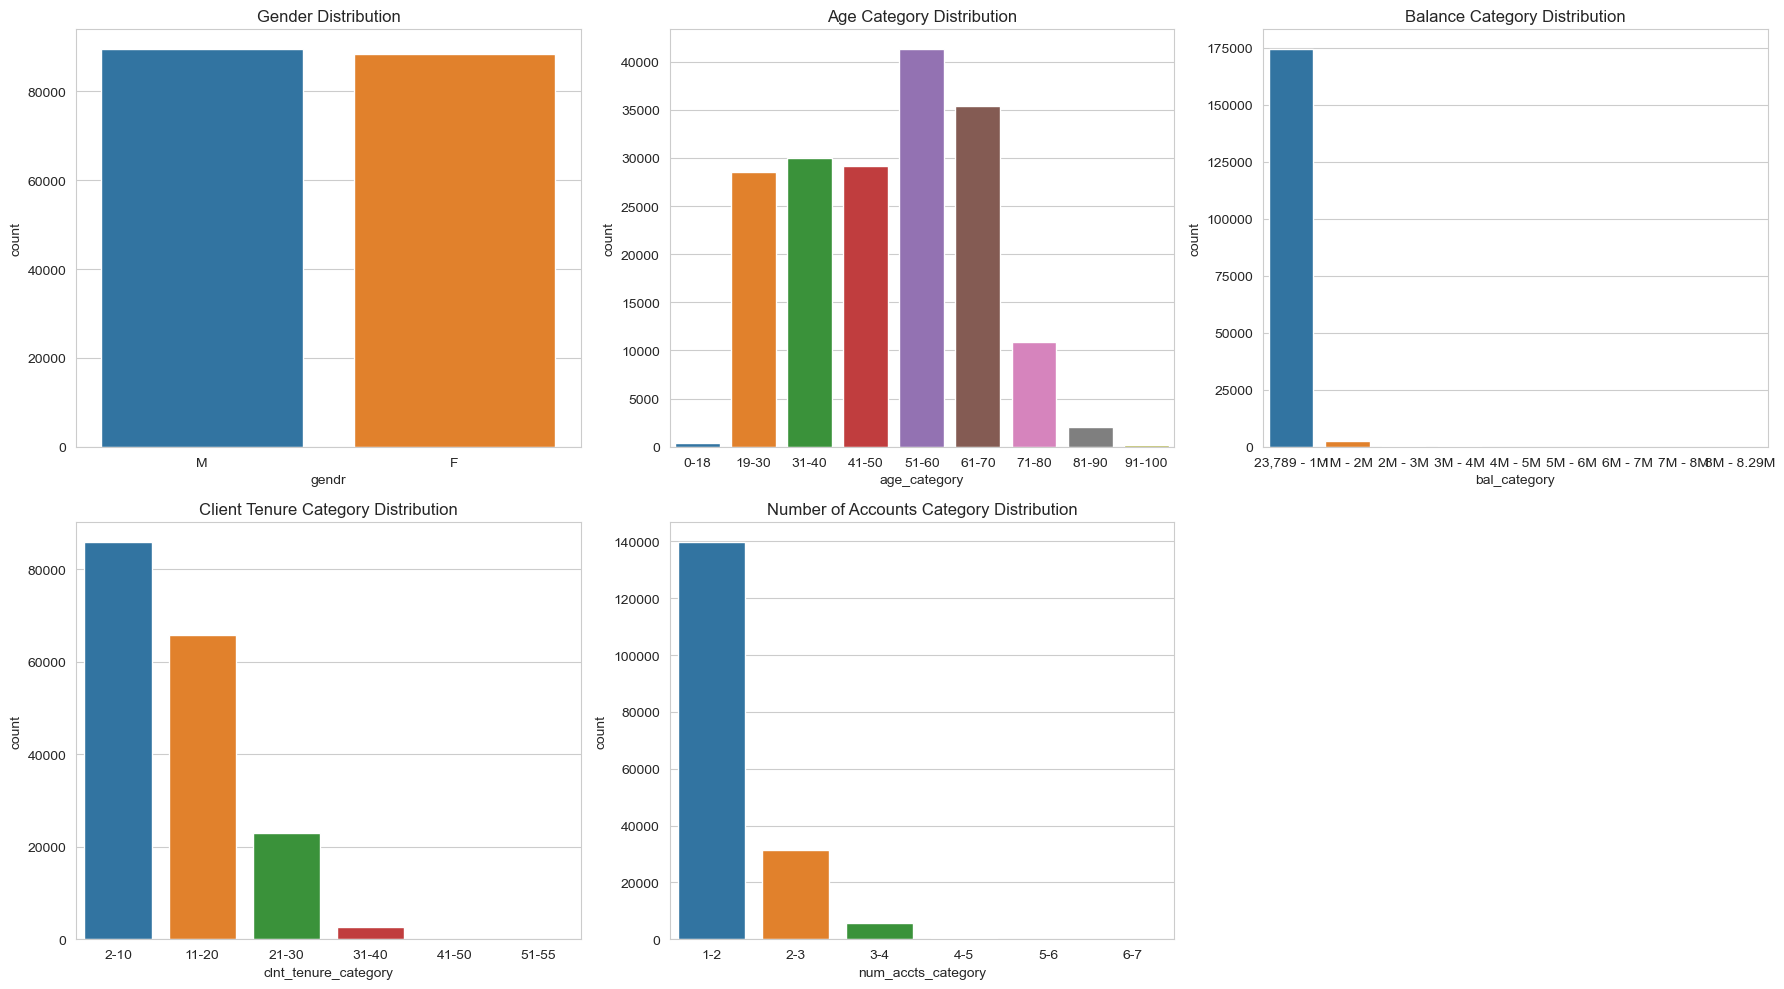

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create subplots for each demographic variable
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Gender distribution
sns.countplot(data=test_group_merged, x='gendr', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Age category distribution
sns.countplot(data=test_group_merged, x='age_category', ax=axes[0, 1])
axes[0, 1].set_title('Age Category Distribution')

# Balance category distribution
sns.countplot(data=test_group_merged, x='bal_category', ax=axes[0, 2])
axes[0, 2].set_title('Balance Category Distribution')

# Client tenure category distribution
sns.countplot(data=test_group_merged, x='clnt_tenure_category', ax=axes[1, 0])
axes[1, 0].set_title('Client Tenure Category Distribution')

# Number of accounts category distribution
sns.countplot(data=test_group_merged, x='num_accts_category', ax=axes[1, 1])
axes[1, 1].set_title('Number of Accounts Category Distribution')

# Hide the empty subplot
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Ploting the Control Group Dataset to see User Demographic

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

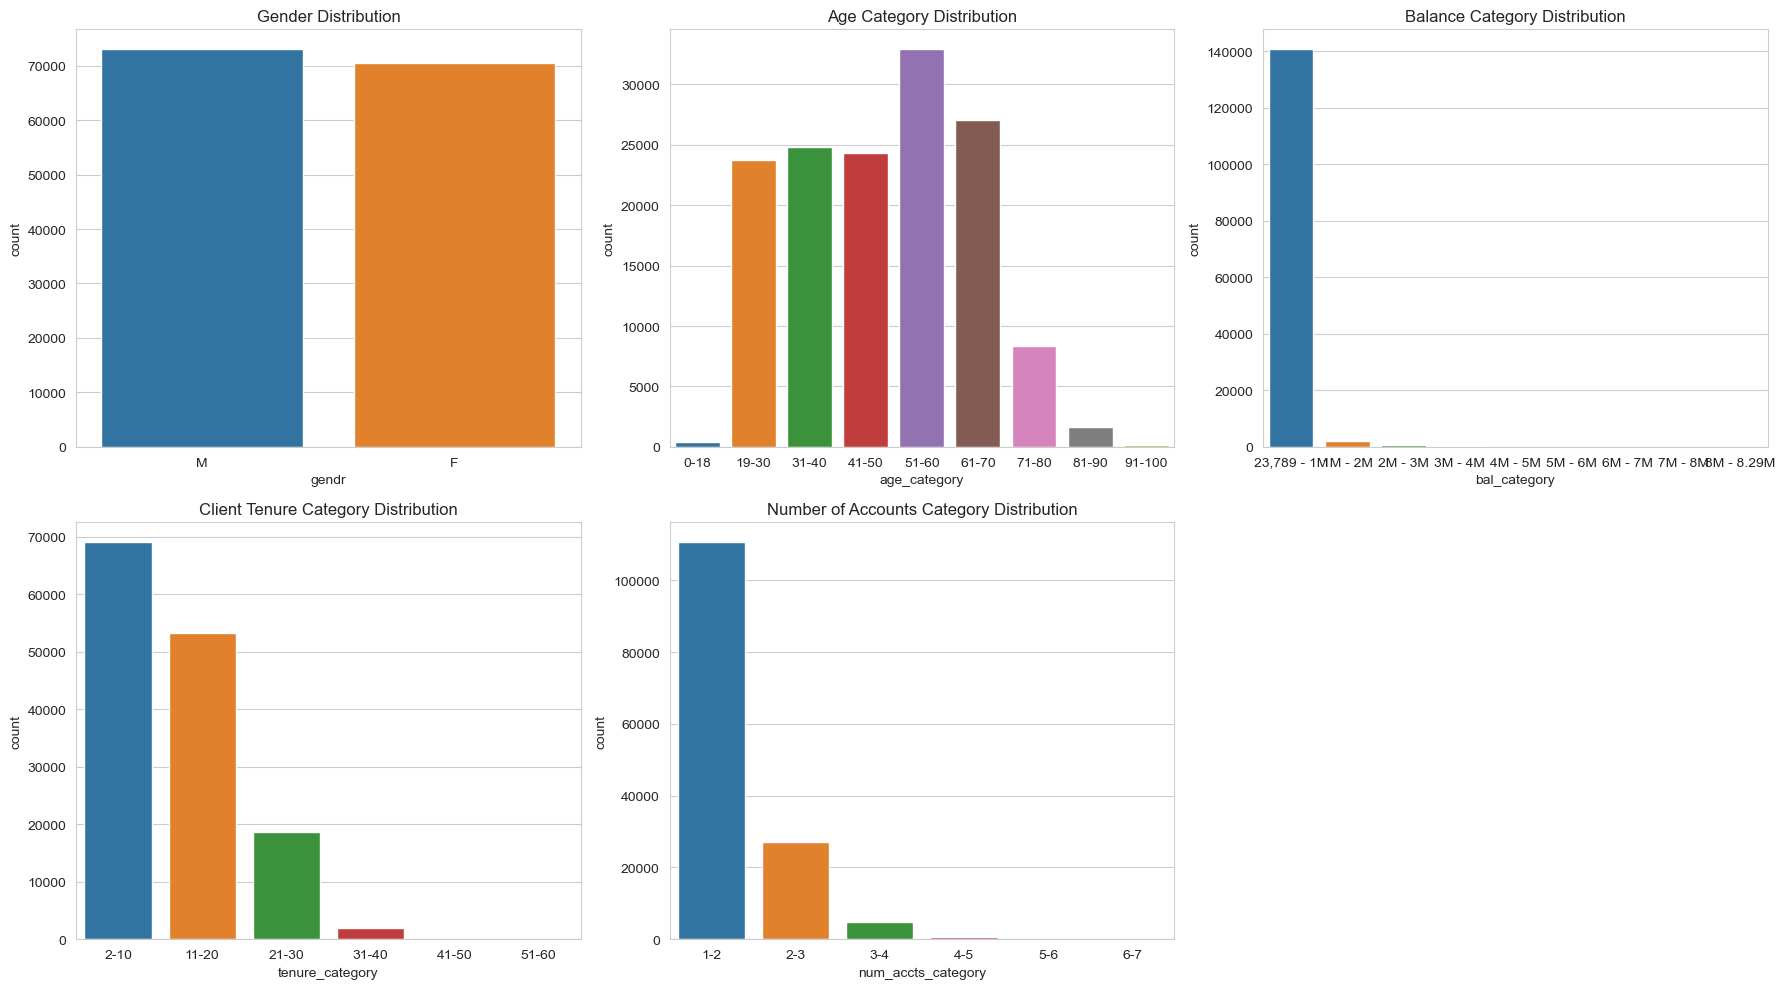

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the seaborn plot
sns.set_style("whitegrid")

# Create subplots for each demographic variable
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Gender distribution
sns.countplot(data=control_group_merged, x='gendr', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Age category distribution
sns.countplot(data=control_group_merged, x='age_category', ax=axes[0, 1])
axes[0, 1].set_title('Age Category Distribution')

# Balance category distribution
sns.countplot(data=control_group_merged, x='bal_category', ax=axes[0, 2])
axes[0, 2].set_title('Balance Category Distribution')

# Client tenure category distribution
sns.countplot(data=control_group_merged, x='tenure_category', ax=axes[1, 0])
axes[1, 0].set_title('Client Tenure Category Distribution')

# Number of accounts category distribution
sns.countplot(data=control_group_merged, x='num_accts_category', ax=axes[1, 1])
axes[1, 1].set_title('Number of Accounts Category Distribution')

# Hide the empty subplot
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Groups the data by clients and separates steps and times into different columns

In [17]:
# Groups the data by clients and separates steps and times into different columns.
# Parameters:
# df : pandas.DataFrame
#     DataFrame with data containing columns 'client_id', 'process_step', and 'date_time'.
# Returns:
# pandas.DataFrame
#     DataFrame where data is grouped by clients, and steps and times are in separate columns.
def group_by_client(df):
    grouped_df = df.groupby("client_id")
    data_dict = {"client_id": [], "step_1": [], "time_1": [], "step_2": [], "time_2": [],
                 "step_3": [], "time_3": [], "step_4": [], "time_4": [], "step_5": [], "time_5": []}
    for client_id, group_data in grouped_df:
        steps = group_data["process_step"].tolist()[::-1]  # Reverse the list to start from the last step
        times = group_data["date_time"].tolist()[::-1]    # Reverse the list to match the reversed steps
        for i in range(5):  # Assuming maximum of 5 steps
            if i < len(steps):
                data_dict[f"step_{i+1}"].append(steps[i])
                data_dict[f"time_{i+1}"].append(times[i])
            else:
                data_dict[f"step_{i+1}"].append(None)  # If there are fewer than 5 steps, fill in with NaN
                data_dict[f"time_{i+1}"].append(None)  # If there are fewer than 5 steps, fill in with NaN
        data_dict["client_id"].append(client_id)
    result_df = pd.DataFrame(data_dict)
    return result_df

# Apply group_by_client function to process_df
process_df_with_steps = group_by_client(process_df)
process_df_with_steps


,client_id,step_1,time_1,step_2,time_2,step_3,time_3,step_4,time_4,step_5,time_5
0,169,start,2017-04-12 20:19:36,step_1,2017-04-12 20:19:45,step_2,2017-04-12 20:20:31,step_3,2017-04-12 20:22:05,confirm,2017-04-12 20:23:09
1,336,start,2017-06-01 07:26:55,start,2017-06-01 07:42:43,None,None,None,None,None,None
2,546,start,2017-06-17 10:03:29,step_1,2017-06-17 10:03:39,step_2,2017-06-17 10:03:52,step_3,2017-06-17 10:05:19,confirm,2017-06-17 10:05:42
3,555,start,2017-04-15 12:57:56,step_1,2017-04-15 12:58:03,step_2,2017-04-15 12:58:35,step_3,2017-04-15 13:00:14,confirm,2017-04-15 13:00:34
4,647,start,2017-04-12 15:41:28,step_1,2017-04-12 15:41:35,step_2,2017-04-12 15:41:53,step_3,2017-04-12 15:45:02,confirm,2017-04-12 15:47:45
...,...,...,...,...,...,...,...,...,...,...,...
120152,9999729,start,2017-05-08 16:08:25,step_1,2017-05-08 16:08:30,step_2,2017-05-08 16:08:40,step_3,2017-05-08 16:09:19,confirm,2017-05-08 16:09:40
120153,9999768,start,2017-06-03 18:05:10,step_1,2017-06-03 18:05:17,step_2,2017-06-03 18:05:44,step_3,2017-06-03 18:07:24,step_2,2017-06-03 18:09:22
120154,9999832,start,2017-05-16 16:46:03,step_1,2017-05-16 16:46:11,None,None,None,None,None,None
120155,9999839,start,2017-03-29 12:08:55,start,2017-03-29 12:11:32,step_1,2017-03-29 12:11:35,step_2,2017-03-29 12:11:50,step_3,2017-03-29 12:12:28


In [18]:
# Groups the data by clients and includes the first and last steps made by each client,
# along with their start and end times.
# Parameters:
# df : pandas.DataFrame
#     DataFrame with data containing columns 'client_id', 'process_step', and 'date_time'.
# Returns:
# pandas.DataFrame
#     DataFrame where data is grouped by clients, including the first and last steps,
#     the start time of the first step, and the end time of the last step.
def group_by_client_start_end(df):
    df['date_time'] = pd.to_datetime(df['date_time'])
    df_sorted = df.sort_values(by=['client_id', 'date_time'])
    grouped_df = df_sorted.groupby("client_id")
    data_dict = {"client_id": [], "start_step": [], "end_step": [], "start_time": [], "end_time": []}
    for client_id, group_data in grouped_df:
        start_step = group_data["process_step"].iloc[0]
        end_step = group_data["process_step"].iloc[-1]
        start_time = group_data["date_time"].iloc[0]
        end_time = group_data["date_time"].iloc[-1]
        data_dict["client_id"].append(client_id)
        data_dict["start_step"].append(start_step)
        data_dict["end_step"].append(end_step)
        data_dict["start_time"].append(start_time)
        data_dict["end_time"].append(end_time)
    result_df = pd.DataFrame(data_dict)
    return result_df

# Apply group_by_client_start_end function to process_df
process_df_by_client_last_step = group_by_client_start_end(process_df)
process_df_by_client_last_step

,client_id,start_step,end_step,start_time,end_time
0,169,start,confirm,2017-04-12 20:19:36,2017-04-12 20:23:09
1,336,start,start,2017-06-01 07:26:55,2017-06-01 07:42:43
2,546,start,confirm,2017-06-17 10:03:29,2017-06-17 10:05:42
3,555,start,confirm,2017-04-15 12:57:56,2017-04-15 13:00:34
4,647,start,confirm,2017-04-12 15:41:28,2017-04-12 15:47:45
...,...,...,...,...,...
120152,9999729,start,confirm,2017-04-05 13:40:49,2017-05-08 16:09:40
120153,9999768,start,confirm,2017-06-03 18:05:10,2017-06-03 18:13:16
120154,9999832,start,step_1,2017-05-16 16:46:03,2017-05-16 16:46:11
120155,9999839,start,confirm,2017-03-29 12:08:55,2017-03-29 12:13:03


### Merged the Dataframe in Test Group and Control Group with first and last steps

In [19]:
# Merge control_group with process_df_by_client_last_step on 'client_id'
control_group_with_steps = pd.merge(control_group, process_df_by_client_last_step, on="client_id")

# Merge test_group with process_df_by_client_last_step on 'client_id'
test_group_with_steps = pd.merge(test_group, process_df_by_client_last_step, on="client_id")

Day 3 (Week 5)

For the project requirements and instructions for today’s tasks in full, please refer to the project brief. However, in order to keep on track you may refer to the daily goals outlined below:

By the end of day, we recommend you have:

Reviewed KPI and Metrics material. Discovered what key performance indicators (KPIs) will determine the success of the new design Use at least completion rate, time spent on each step and error rates. Add any KPIs you might find relevant. Evaluated how the new design’s performance compare to the old one, given the chosen KPIs (completion rate, time spent on each step and error rates).

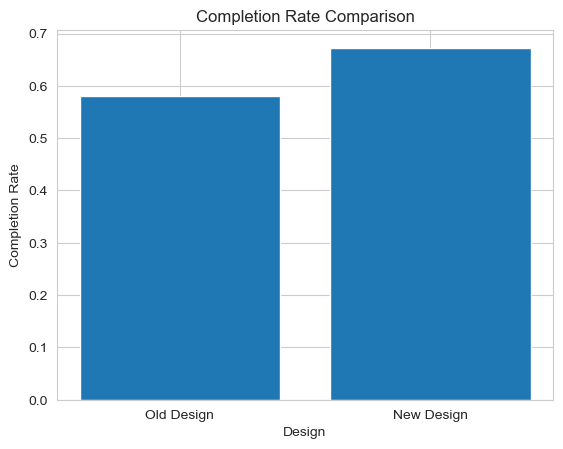

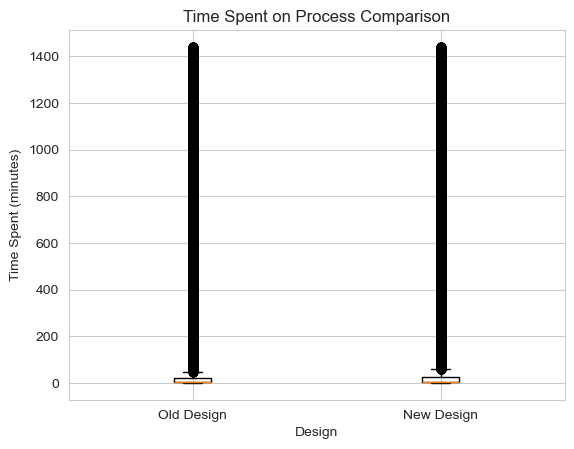

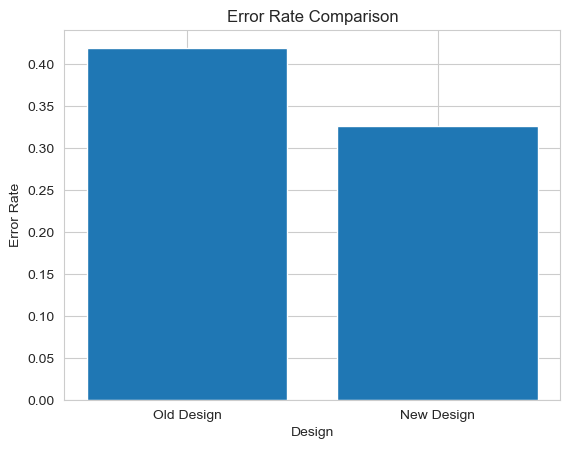

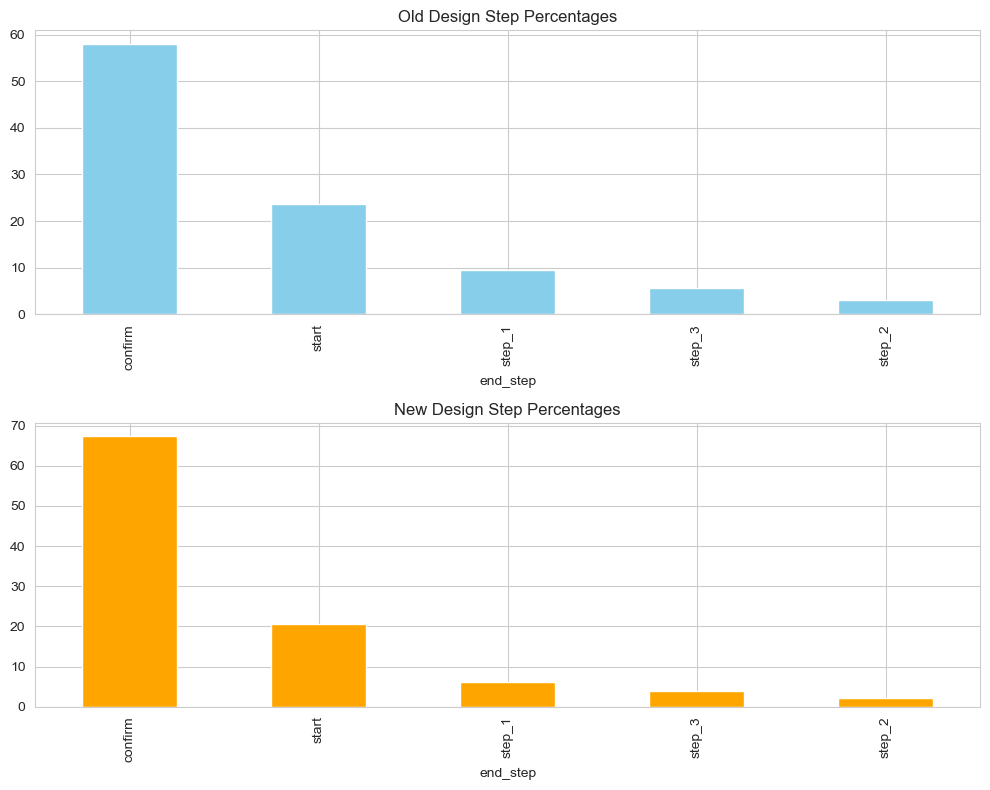

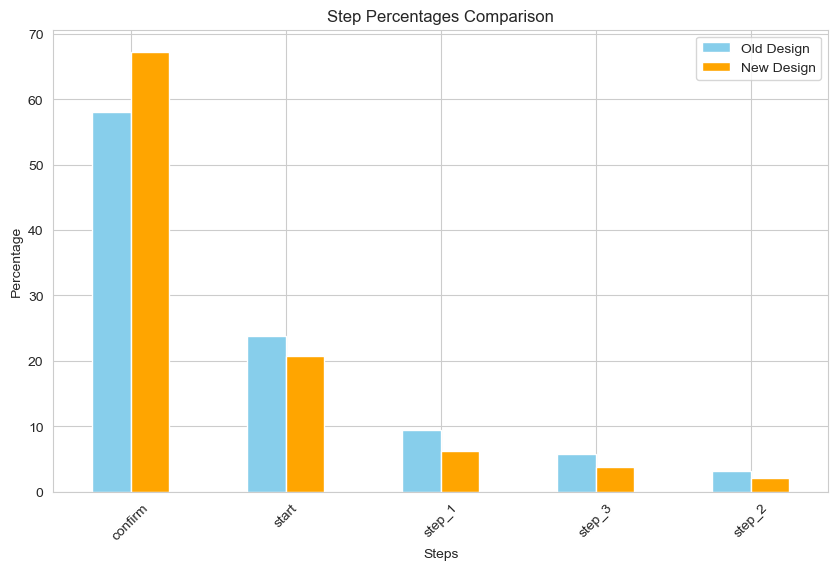

In [20]:
import matplotlib.pyplot as plt

# Step 1: Define Key Performance Indicators (KPIs)

# Step 2: Data Analysis

## Completion Rate Analysis
old_completion_rate = (control_group_with_steps['end_step'] == 'confirm').mean()
new_completion_rate = (test_group_with_steps['end_step'] == 'confirm').mean()

## Time Spent Analysis
old_time_spent = control_group_with_steps.groupby('client_id').apply(lambda x: x['end_time'].max() - x['start_time'].min())
new_time_spent = test_group_with_steps.groupby('client_id').apply(lambda x: x['end_time'].max() - x['start_time'].min())

## Error Rate Analysis
old_errors = control_group_with_steps[control_group_with_steps['end_step'] != 'confirm']
new_errors = test_group_with_steps[test_group_with_steps['end_step'] != 'confirm']

old_error_rate = len(old_errors) / len(control_group_with_steps)
new_error_rate = len(new_errors) / len(test_group_with_steps)

# Step 3: Visualization and Reporting

## Completion Rate Visualization
plt.bar(['Old Design', 'New Design'], [old_completion_rate, new_completion_rate])
plt.title('Completion Rate Comparison')
plt.xlabel('Design')
plt.ylabel('Completion Rate')
plt.show()

## Time Spent Visualization
plt.boxplot([old_time_spent.dt.seconds/60, new_time_spent.dt.seconds/60], labels=['Old Design', 'New Design'])
plt.title('Time Spent on Process Comparison')
plt.xlabel('Design')
plt.ylabel('Time Spent (minutes)')
plt.show()

## Error Rate Visualization
plt.bar(['Old Design', 'New Design'], [old_error_rate, new_error_rate])
plt.title('Error Rate Comparison')
plt.xlabel('Design')
plt.ylabel('Error Rate')
plt.show()


# Calculate step percentages
def calculate_step_percentages(data):
    step_counts = data['end_step'].value_counts(normalize=True) * 100
    return step_counts

## Step Analysis Visualization
old_step_percentages = calculate_step_percentages(control_group_with_steps)
new_step_percentages = calculate_step_percentages(test_group_with_steps)

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

old_step_percentages.plot(kind='bar', ax=axes[0], color='skyblue')
new_step_percentages.plot(kind='bar', ax=axes[1], color='orange')
axes[0].set_title('Old Design Step Percentages')
axes[1].set_title('New Design Step Percentages')
plt.tight_layout()
plt.show()

# Concatenate the step percentages dataframes along the columns axis
combined_step_percentages = pd.concat([old_step_percentages, new_step_percentages], axis=1)

# Plot the combined step percentages
combined_step_percentages.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Step Percentages Comparison')
plt.xlabel('Steps')
plt.ylabel('Percentage')
plt.legend(['Old Design', 'New Design'])
plt.xticks(rotation=45)
plt.show()


### Calculating the time difference for each step

In [53]:
# Converting 'date_time' column to datetime format
test_group_merged['date_time'] = pd.to_datetime(test_group_merged['date_time'])

# Splitting 'date_time' into 'date' and 'time' columns
test_group_merged['date'] = test_group_merged['date_time'].dt.date
test_group_merged['time'] = test_group_merged['date_time'].dt.time

# Sorting the DataFrame by 'visit_id' and 'time'
test_group_merged.sort_values(by=['visit_id', 'time'], inplace=True)

# Removing duplicate steps, keeping only the first occurrence
df_unique_steps = test_group_merged.drop_duplicates(subset=['visit_id', 'process_step'], keep='first')

# Calculating the time spent on each step for each visit
test_group_merged['time_diff'] = test_group_merged.groupby('visit_id')['date_time'].diff()

# Converting the time difference to minutes
test_group_merged['time_diff_seconds'] = test_group_merged['time_diff'].dt.total_seconds()


In [54]:
# Calculating the time difference for each step
test_group_merged['time_diff'] = test_group_merged.groupby(['visit_id'])['date_time'].diff()
# Grouping by 'process_step' and calculating the average time for each step
avg_time_per_step = test_group_merged.groupby('process_step')['time_diff'].mean()
# Printing the result
print(avg_time_per_step)

process_step
confirm   0 days 00:02:08.407350963
start     0 days 00:02:21.177248564
step_1    0 days 00:00:37.638653931
step_2    0 days 00:00:48.000194811
step_3    0 days 00:01:36.792206778
Name: time_diff, dtype: timedelta64[ns]


/var/folders/hs/qn6zr6b15fbbv5dc9slqtd6m0000gn/T/ipykernel_60546/3267424963.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_per_step = test_group_merged.groupby('process_step')['time_diff'].mean()


In [51]:
# Converting 'date_time' column to datetime format
control_group_merged['date_time'] = pd.to_datetime(control_group_merged['date_time'])

# Splitting 'date_time' into 'date' and 'time' columns
control_group_merged['date'] = control_group_merged['date_time'].dt.date
control_group_merged['time'] = control_group_merged['date_time'].dt.time

# Sorting the DataFrame by 'visit_id' and 'time'
control_group_merged.sort_values(by=['visit_id', 'time'], inplace=True)

# Removing duplicate steps, keeping only the first occurrence
df_unique_steps = control_group_merged.drop_duplicates(subset=['visit_id', 'process_step'], keep='first')

# Calculating the time spent on each step for each visit
control_group_merged['time_diff'] = control_group_merged.groupby('visit_id')['date_time'].diff()

# Converting the time difference to minutes
control_group_merged['time_diff_seconds'] = control_group_merged['time_diff'].dt.total_seconds()


In [52]:
# Calculating the time difference for each step
control_group_merged['time_diff'] = control_group_merged.groupby(['visit_id'])['date_time'].diff()
# Grouping by 'process_step' and calculating the average time for each step
avg_time_per_step = control_group_merged.groupby('process_step')['time_diff'].mean()
# Printing the result
print(avg_time_per_step)

process_step
confirm   0 days 00:02:08.503856041
start     0 days 00:02:22.408741279
step_1    0 days 00:00:43.000442718
step_2    0 days 00:00:38.641442770
step_3    0 days 00:01:32.938077756
Name: time_diff, dtype: timedelta64[ns]


/var/folders/hs/qn6zr6b15fbbv5dc9slqtd6m0000gn/T/ipykernel_60546/2093892129.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_time_per_step = control_group_merged.groupby('process_step')['time_diff'].mean()


Day 4 (Week 5) For the project requirements and instructions for today’s tasks in full, please refer to the project brief. However, in order to keep on track you may refer to the daily goals outlined below:

By the end of both day 4 and day 5, we recommend you have:

Confirmed if the difference in completion rate of the the new design and the old design is statistically significant. Carried out an analysis ensuring that the observed increase in completion rate from the A/B test meets or exceeds this 5% threshold. Carried out another hypothesis test of your choosing. Evaluated the experiment by answering questions relating to: Design Effectiveness Duration Additional Data Needs

In [25]:
import numpy as np
import scipy.stats as stats

def hypothesis_test(control_data, test_data, alpha=0.05):
    # Step 1: Formulate Hypotheses
    # Null Hypothesis (H0): 𝜇_old = 𝜇_new
    # Alternative Hypothesis (H1): 𝜇_old ≠ 𝜇_new
    
    # Step 2: Choose Significance Level (Alpha)
    # Alpha is already provided as a parameter
    
    # Step 3: Calculate Test Statistic
    t_statistic, p_value = stats.ttest_ind(control_data, test_data)
    
    # Step 4: Determine Degrees of Freedom
    df = len(control_data) + len(test_data) - 2
    
    # Step 5: Calculate p-value
    # For a two-tailed test, multiply the p-value by 2
    p_value *= 2
    
    # Step 6: Make Decision
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"
    
    return t_statistic, df, p_value, decision

# Example usage:
control_data = control_group_with_steps['end_step'] == 'confirm'  # Completion rates for control group
test_data = test_group_with_steps['end_step'] == 'confirm'        # Completion rates for test group

t_statistic, df, p_value, decision = hypothesis_test(control_data, test_data)

print("Test Statistic:", t_statistic)
print("Degrees of Freedom:", df)
print("p-value:", p_value)
print("Decision:", decision)

Test Statistic: -21.642969269613626
Degrees of Freedom: 50485
p-value: 4.18804279000344e-103
Decision: Reject the null hypothesis


Test Statistic: The calculated value of the test statistic is -21.64. This value indicates how many standard deviations the sample mean is from the null hypothesis mean. A negative value suggests that the control group mean is lower than the test group mean.
Degrees of Freedom: The degrees of freedom (df) for this test is 50485. It is calculated based on the sample sizes of the control and test groups.
p-value: The p-value is very close to zero (4.18804279000344e-103), indicating strong evidence against the null hypothesis. It suggests that the observed difference in completion rates between the control and test groups is statistically significant.
Decision: Since the p-value is much smaller than the chosen significance level (alpha=0.05), we reject the null hypothesis. In other words, we conclude that there is a statistically significant difference in completion rates between the control and test groups.

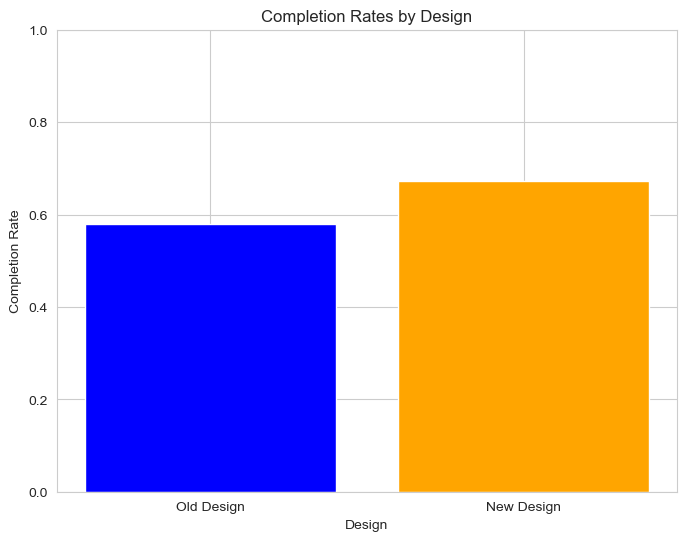

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Data
completion_rates = [old_completion_rate.mean(), new_completion_rate.mean()]
labels = ['Old Design', 'New Design']

# Plot
plt.figure(figsize=(8, 6))
plt.bar(labels, completion_rates, color=['blue', 'orange'])
plt.title('Completion Rates by Design')
plt.xlabel('Design')
plt.ylabel('Completion Rate')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.show()

In [26]:
# Convert time-related columns to datetime data type
control_group_with_steps['start_time'] = pd.to_datetime(control_group_with_steps['start_time'])
control_group_with_steps['end_time'] = pd.to_datetime(control_group_with_steps['end_time'])

# Calculate duration in minutes
control_group_with_steps['duration_minutes'] = (control_group_with_steps['end_time'] - control_group_with_steps['start_time']).dt.total_seconds() / 60

# Display the DataFrame with the new duration column
print(control_group_with_steps[['start_time', 'end_time', 'duration_minutes']])

# Convert time-related columns to datetime data type
test_group_with_steps['start_time'] = pd.to_datetime(test_group_with_steps['start_time'])
test_group_with_steps['end_time'] = pd.to_datetime(test_group_with_steps['end_time'])

# Calculate duration in minutes
test_group_with_steps['duration_minutes'] = (test_group_with_steps['end_time'] - test_group_with_steps['start_time']).dt.total_seconds() / 60

# Display the DataFrame with the new duration column
print(test_group_with_steps[['start_time', 'end_time', 'duration_minutes']])

               start_time            end_time  duration_minutes
0     2017-05-21 11:02:21 2017-05-21 11:07:16          4.916667
1     2017-06-14 14:22:31 2017-06-14 14:22:31          0.000000
2     2017-03-29 13:54:15 2017-03-29 14:00:45          6.500000
3     2017-04-05 16:49:52 2017-04-05 16:53:48          3.933333
4     2017-03-29 11:52:45 2017-03-29 11:57:25          4.666667
...                   ...                 ...               ...
23521 2017-04-05 14:08:22 2017-06-05 16:09:59      87961.616667
23522 2017-04-07 21:48:01 2017-04-07 21:48:01          0.000000
23523 2017-05-24 09:57:16 2017-06-07 00:42:30      19605.233333
23524 2017-04-10 12:16:03 2017-04-10 12:19:52          3.816667
23525 2017-04-12 19:03:36 2017-04-12 19:06:55          3.316667

[23526 rows x 3 columns]
               start_time            end_time  duration_minutes
0     2017-03-29 10:58:35 2017-04-02 11:51:13       5812.633333
1     2017-04-06 09:28:02 2017-04-07 09:16:00       1427.966667
2     2017-04-

In [31]:
def hypothesis_test(control_data, test_data, alpha=0.05):
    # Step 1: Formulate Hypotheses
    # Null Hypothesis (H0): μ_test = μ_control
    # Alternative Hypothesis (H1): μ_test ≠ μ_control
    
    # Step 2: Choose Significance Level (Alpha)
    # Alpha is already provided as a parameter
    
    # Step 3: Calculate Test Statistic
    t_statistic, p_value = stats.ttest_ind(control_data, test_data)
    
    # Step 4: Determine Degrees of Freedom
    df = len(control_data) + len(test_data) - 2
    
    # Step 5: Calculate p-value
    # For a two-tailed test, multiply the p-value by 2
    p_value *= 2
    
    # Step 6: Make Decision
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"
    
    return t_statistic, df, p_value, decision

# Example usage:
control_data = control_group_with_steps['duration_minutes']
test_data = test_group_with_steps['duration_minutes']

t_statistic, df, p_value, decision = hypothesis_test(control_data, test_data)

print("Test Statistic:", t_statistic)
print("Degrees of Freedom:", df)
print("p-value:", p_value)
print("Decision:", decision)


Test Statistic: 2.8868320205141718
Degrees of Freedom: 50485
p-value: 0.007786139291961592
Decision: Reject the null hypothesis


Based on the provided data and the hypothesis test results:

Test Statistic: 2.8868

The test statistic measures the difference between the mean durations of test_group_with_steps and control_group_with_steps in terms of standard error units.
Degrees of Freedom: 50485

The degrees of freedom represent the number of independent pieces of information available in the data. In this case, it is determined by the sample sizes of both groups.
p-value: 0.0078

The p-value is the probability of observing a test statistic as extreme as, or more extreme than, the one calculated from the sample data if the null hypothesis were true. Here, the p-value is less than the significance level (α = 0.05), indicating statistical significance.
Decision: Reject the null hypothesis

Since the p-value is less than the chosen significance level, we reject the null hypothesis. This suggests that there is a statistically significant difference between the mean durations of test_group_with_steps and control_group_with_steps. Therefore, we can conclude that there is evidence to support the alternative hypothesis, indicating that the mean duration in test_group_with_steps is not equal to the mean duration in control_group_with_steps.

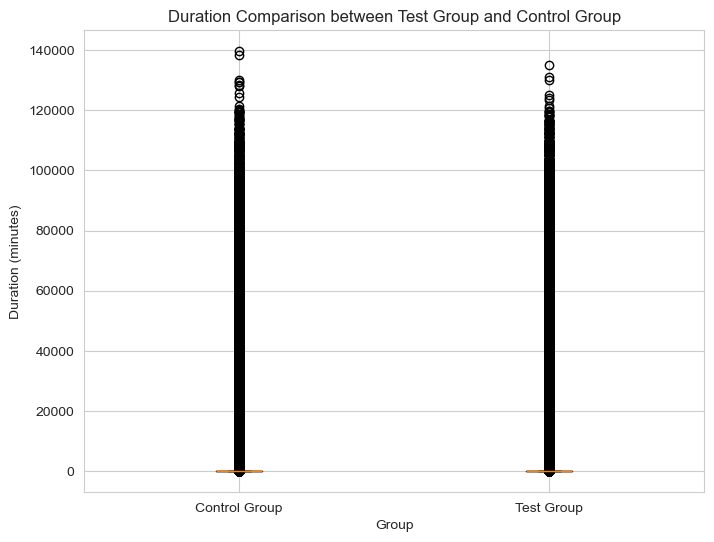

In [46]:
import matplotlib.pyplot as plt

# Get duration data for each group
control_data = control_group_with_steps['duration_minutes']
test_data = test_group_with_steps['duration_minutes']

# Create a box plot
plt.figure(figsize=(8, 6))
plt.boxplot([control_data, test_data], labels=['Control Group', 'Test Group'])
plt.title('Duration Comparison between Test Group and Control Group')
plt.xlabel('Group')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()


In [44]:
import scipy.stats as stats

def chi_square_test(control_data, test_data, alpha=0.05):
    # Step 1: Create a contingency table
    contingency_table = [[control_data, len(control_group_with_steps) - control_data],
                         [test_data, len(test_group_with_steps) - test_data]]
    
    # Step 2: Perform chi-square test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    # Step 3: Make Decision
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"
    
    return chi2_stat, dof, p_value, decision

# Example usage:
control_error_count = len(control_group_with_steps[control_group_with_steps['end_step'] != 'confirm'])
test_error_count = len(test_group_with_steps[test_group_with_steps['end_step'] != 'confirm'])

chi2_stat, dof, p_value, decision = chi_square_test(control_error_count, test_error_count)

print("Chi-square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("p-value:", p_value)
print("Decision:", decision)


Chi-square Statistic: 463.73236591488035
Degrees of Freedom: 1
p-value: 7.407489340782812e-103
Decision: Reject the null hypothesis


When there's a significant difference in error rates between the control and test groups, it implies that the intervention (the change introduced in the test group) has had a measurable impact on the outcome being observed. Here's what it means in practical terms:

Higher Error Rate in Control Group: If the error rate is significantly higher in the control group compared to the test group, it suggests that the intervention implemented in the test group might be effective in reducing errors. In this case, further investigation into the nature of the intervention and its impact is warranted.
Higher Error Rate in Test Group: Conversely, if the error rate is significantly higher in the test group, it indicates that the intervention might have unintended consequences or may not be as effective as expected. It suggests that adjustments or improvements to the intervention may be necessary.
Implications for Decision Making: The difference in error rates between the control and test groups can inform decision-making processes. If the intervention in the test group leads to a significantly lower error rate, it may justify its implementation on a larger scale. Conversely, if the intervention does not show a significant improvement or leads to a higher error rate, it may be reconsidered or modified before broader implementation.

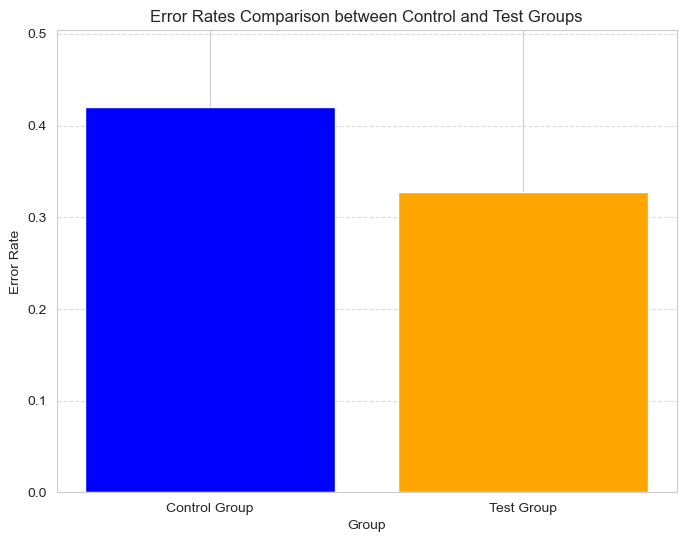

In [47]:
# Filter errors in control and test groups
control_errors = control_group_with_steps[control_group_with_steps['end_step'] != 'confirm']
test_errors = test_group_with_steps[test_group_with_steps['end_step'] != 'confirm']

# Calculate error rates
control_error_rate = control_errors.shape[0] / len(control_group_with_steps)
test_error_rate = test_errors.shape[0] / len(test_group_with_steps)

# Define groups and their error rates
groups = ['Control Group', 'Test Group']
error_rates = [control_error_rate, test_error_rate]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(groups, error_rates, color=['blue', 'orange'])
plt.title('Error Rates Comparison between Control and Test Groups')
plt.xlabel('Group')
plt.ylabel('Error Rate')
plt.ylim(0, max(error_rates) * 1.2)  # Adjust y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Preparing the data to be converted into CSV file

In [5]:
test_group_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,age_category,clnt_tenure_category,bal_category,num_accts_category
0,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13,61-70,2-10,"23,789 - 1M",1-2
1,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50,61-70,2-10,"23,789 - 1M",1-2
2,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45,61-70,2-10,"23,789 - 1M",1-2
3,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08,61-70,2-10,"23,789 - 1M",1-2
4,836976,6.0,73.0,60.5,M,2.0,45105.30,6.0,9.0,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24,61-70,2-10,"23,789 - 1M",1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177782,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15,61-70,11-20,"23,789 - 1M",2-3
177783,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51,61-70,11-20,"23,789 - 1M",2-3
177784,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40,61-70,11-20,"23,789 - 1M",2-3
177785,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11,61-70,11-20,"23,789 - 1M",2-3


In [6]:
control_group_merged

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time,age_category,tenure_category,bal_category,num_accts_category
0,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16,51-60,2-10,"23,789 - 1M",1-2
1,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_3,2017-05-21 11:04:53,51-60,2-10,"23,789 - 1M",1-2
2,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_2,2017-05-21 11:04:04,51-60,2-10,"23,789 - 1M",1-2
3,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,step_1,2017-05-21 11:03:31,51-60,2-10,"23,789 - 1M",1-2
4,2304905,7.0,94.0,58.0,M,2.0,110860.30,6.0,9.0,336210275_56978226960,724930510_65323235593_692754,start,2017-05-21 11:03:25,51-60,2-10,"23,789 - 1M",1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143403,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,confirm,2017-04-12 19:06:55,61-70,21-30,4M - 5M,2-3
143404,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_3,2017-04-12 19:05:14,61-70,21-30,4M - 5M,2-3
143405,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_2,2017-04-12 19:04:29,61-70,21-30,4M - 5M,2-3
143406,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,663474827_38847225720,923772865_74694577233_449836,step_1,2017-04-12 19:04:07,61-70,21-30,4M - 5M,2-3


In [7]:
# Add a new column 'Variation' with value 'Test'
test_group_merged['Variation'] = 'Test'

In [8]:
# Add a new column 'Variation' with value 'Test'
control_group_merged['Variation'] = 'Control'

In [9]:
# Converting 'date_time' column to datetime format
control_group_merged['date_time'] = pd.to_datetime(control_group_merged['date_time'])

# Splitting 'date_time' into 'date' and 'time' columns
control_group_merged['date'] = control_group_merged['date_time'].dt.date
control_group_merged['time'] = control_group_merged['date_time'].dt.time

# Sorting the DataFrame by 'visit_id' and 'time'
control_group_merged.sort_values(by=['visit_id', 'time'], inplace=True)

# Removing duplicate steps, keeping only the first occurrence
df_unique_steps = control_group_merged.drop_duplicates(subset=['visit_id', 'process_step'], keep='first')

# Calculating the time spent on each step for each visit
control_group_merged['time_diff'] = control_group_merged.groupby('visit_id')['date_time'].diff()

# Converting the time difference to minutes
control_group_merged['time_diff_seconds'] = control_group_merged['time_diff'].dt.total_seconds()

# Displaying the DataFrame with the new column
print(control_group_merged[['date', 'time', 'time_diff_seconds']])

# Displaying the updated DataFrame
print(control_group_merged)


              date      time  time_diff_seconds
66061   2017-03-22  11:07:49                NaN
102210  2017-04-14  16:41:51                NaN
102209  2017-04-14  16:43:16               85.0
102208  2017-04-14  16:43:55               39.0
102207  2017-04-14  16:44:03                8.0
...            ...       ...                ...
42233   2017-04-20  09:45:18                NaN
42232   2017-04-20  09:46:26               68.0
42231   2017-04-20  09:47:04               38.0
42230   2017-04-20  09:48:45              101.0
42229   2017-04-20  10:02:48              843.0

[143408 rows x 3 columns]
        client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
66061      105007             9.0             118.0      35.0     F   
102210    5623007            16.0             202.0      78.0     M   
102209    5623007            16.0             202.0      78.0     M   
102208    5623007            16.0             202.0      78.0     M   
102207    5623007            16.0         

In [10]:
# Converting 'date_time' column to datetime format
test_group_merged['date_time'] = pd.to_datetime(test_group_merged['date_time'])

# Splitting 'date_time' into 'date' and 'time' columns
test_group_merged['date'] = test_group_merged['date_time'].dt.date
test_group_merged['time'] = test_group_merged['date_time'].dt.time

# Sorting the DataFrame by 'visit_id' and 'time'
test_group_merged.sort_values(by=['visit_id', 'time'], inplace=True)

# Removing duplicate steps, keeping only the first occurrence
df_unique_steps = test_group_merged.drop_duplicates(subset=['visit_id', 'process_step'], keep='first')

# Calculating the time spent on each step for each visit
test_group_merged['time_diff'] = test_group_merged.groupby('visit_id')['date_time'].diff()

# Converting the time difference to minutes
test_group_merged['time_diff_seconds'] = test_group_merged['time_diff'].dt.total_seconds()

# Displaying the DataFrame with the new column
print(test_group_merged[['date', 'time', 'time_diff_seconds']])

# Displaying the updated DataFrame
print(test_group_merged)


              date      time  time_diff_seconds
168339  2017-04-26  13:22:17                NaN
168338  2017-04-26  13:23:09               52.0
44044   2017-04-09  16:20:56                NaN
44043   2017-04-09  16:21:12               16.0
44042   2017-04-09  16:21:21                9.0
...            ...       ...                ...
110696  2017-04-21  23:49:11                NaN
110695  2017-04-21  23:49:22               11.0
110694  2017-04-21  23:50:16               54.0
110693  2017-04-21  23:51:00               44.0
110692  2017-04-21  23:51:09                9.0

[177779 rows x 3 columns]
        client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
168339    3561384             4.0              56.0      59.5     F   
168338    3561384             4.0              56.0      59.5     F   
44044     7338123             7.0              88.0      23.5     M   
44043     7338123             7.0              88.0      23.5     M   
44042     7338123             7.0         

In [11]:
# Check data types of columns in control_group_merged
print("Data types in control_group_merged:")
print(control_group_merged.dtypes)

# Check data types of columns in test_group_merged
print("\nData types in test_group_merged:")
print(test_group_merged.dtypes)


Data types in control_group_merged:
client_id                       int64
clnt_tenure_yr                float64
clnt_tenure_mnth              float64
clnt_age                      float64
gendr                          object
num_accts                     float64
bal                           float64
calls_6_mnth                  float64
logons_6_mnth                 float64
visitor_id                     object
visit_id                       object
process_step                   object
date_time              datetime64[ns]
age_category                 category
tenure_category              category
bal_category                 category
num_accts_category           category
Variation                      object
date                           object
time                           object
time_diff             timedelta64[ns]
time_diff_seconds             float64
dtype: object

Data types in test_group_merged:
client_id                         int64
clnt_tenure_yr                  float64


In [12]:
# Convert float columns to integer in control_group_merged
control_group_merged['clnt_tenure_yr'] = control_group_merged['clnt_tenure_yr'].astype(int)
control_group_merged['clnt_tenure_mnth'] = control_group_merged['clnt_tenure_mnth'].astype(int)
control_group_merged['clnt_age'] = control_group_merged['clnt_age'].astype(int)
control_group_merged['num_accts'] = control_group_merged['num_accts'].astype(int)
control_group_merged['bal'] = control_group_merged['bal'].astype(int)
control_group_merged['calls_6_mnth'] = control_group_merged['calls_6_mnth'].astype(int)
control_group_merged['logons_6_mnth'] = control_group_merged['logons_6_mnth'].astype(int)

# Convert float columns to integer in test_group_merged
test_group_merged['clnt_tenure_yr'] = test_group_merged['clnt_tenure_yr'].astype(int)
test_group_merged['clnt_tenure_mnth'] = test_group_merged['clnt_tenure_mnth'].astype(int)
test_group_merged['clnt_age'] = test_group_merged['clnt_age'].astype(int)
test_group_merged['num_accts'] = test_group_merged['num_accts'].astype(int)
test_group_merged['bal'] = test_group_merged['bal'].astype(int)
test_group_merged['calls_6_mnth'] = test_group_merged['calls_6_mnth'].astype(int)
test_group_merged['logons_6_mnth'] = test_group_merged['logons_6_mnth'].astype(int)


In [13]:
# Check data types of columns in control_group_merged
print("Data types in control_group_merged:")
print(control_group_merged.dtypes)

# Check data types of columns in test_group_merged
print("\nData types in test_group_merged:")
print(test_group_merged.dtypes)

Data types in control_group_merged:
client_id                       int64
clnt_tenure_yr                  int64
clnt_tenure_mnth                int64
clnt_age                        int64
gendr                          object
num_accts                       int64
bal                             int64
calls_6_mnth                    int64
logons_6_mnth                   int64
visitor_id                     object
visit_id                       object
process_step                   object
date_time              datetime64[ns]
age_category                 category
tenure_category              category
bal_category                 category
num_accts_category           category
Variation                      object
date                           object
time                           object
time_diff             timedelta64[ns]
time_diff_seconds             float64
dtype: object

Data types in test_group_merged:
client_id                         int64
clnt_tenure_yr                    int64


In [14]:
# Convert data types in control_group_merged
control_group_merged['process_step'] = control_group_merged['process_step'].astype('category')

# Convert data types in test_group_merged
test_group_merged['process_step'] = test_group_merged['process_step'].astype('category')


In [16]:
# Assuming you have already loaded your dataframes test_group_merged and control_group_merged

# Concatenate the dataframes along the rows
concatenated_df = pd.concat([test_group_merged, control_group_merged])

# Save the concatenated dataframe to a CSV file
concatenated_df.to_csv('Vanguard_Cleaned_Datatype.csv', index=False)